### Flight Price Prediction

# Table of Contents
​
####  Context
####  Data Dictionary
####  Problem
####  Libraries
####  Read and Understand Data
####  Data Preprocessing
####  Exploratory Data Analysis
​
#####     .Univariate Analysis
#####     .Bivariate and Multivariate Analysis
​

####  Insights based on EDA

​
####  Model Building
​
####    ..LinearRegression
####    .. RidgeRegression
####     ..Random Forest Regression





​


#### Context
##### Flight ticket prices can be something hard to guess, today we might see a price, 
##### check out the price of the same flight tomorrow, it will be a different story. 
##### We might have often heard travellers saying that flight ticket prices are so unpredictable.
##### Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. 
######  Size of training set: 8534 records Size of test set: 2135 records
        
        
        
#### Data Dictionary

#### Features

##### 1 . ID: Contiguous sample number

#####  2 . Airline: The name of the airline

#####  3 . Date_of_Journey: The date of the journey

#####  4 . Source: The source from which the service begins

#####  5 . Destination: The destination where the service ends

#####  6 . Dep_Time: The time when the journey starts from the source.

#####  7 . Arrival_Time: Time of arrival at the destination.

#####  8 . Duration: Total duration of the flight.

#####  9 . Total_Stops: Total stops between the source and destination.

##### 10 . Additional_Info: Additional information about the flight

##### Problem

##### Target

###### Price: The price of the ticket

        
#####  Research Questions
###### The aim of our study is to answer the below research questions:
######  a) Does price vary with Airlines?
######  b) How the price changes with change in Source and Destination?
######  c) Does price also vary with total_stops






##### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)

In [2]:
import sklearn
print('sklearn :%s' % sklearn.__version__)

sklearn :1.0


In [3]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#### Data Preprocessing

In [4]:
class get_data(object):
    
    # Constructor
    def __init__(self,  data: str):
        self.data = data
        
        
        ##  a function to check if data is a valid url
    def is_url(self):
        """
        This function takes in  a url of this format 'https://www.example.com/tayo.csv or tayo.xsl'
        and returns the dataframe of  the data.
        """
        
        valid= validators.url(self.data)
        if valid==True:
            
            self.df= {}
            
                
              
            real_data= self.data.rsplit('/', -1)[-1]
                
            ext= real_data.rsplit('.', -1)[-1]
            
            ## check if it is a csv file    
            if ext == 'csv':
                ## read the csv file
                Data= pd.read_csv(self.data, sep= ";")
                
                ## create a dataframe
                self.df= pd.DataFrame(Data, columns= Data.columns.tolist())
                return self.df 
            elif ext == 'xlsx':
                Data= pd.read_excel(r'self.data', sep =";")
                self.df= pd.DataFrame(Data, columns= Data.columns.tolist())
                return self.df
                    
            else:
                print('Invalid Format')
                
                
        else:
            print('URL is Invalid')
                
                
    def is_file(self): 
        """
        This function takes in a path of this form 'C://Users//Document//tayo.csv or tayo.xslx' and it
        returns a dataframe of the data
        """
            
        path= self.data
        it_exists= os.path.exists(path)
        if it_exists== True:
            
            self.df= {}
                
            ext= path.rsplit('.', -1)[-1]
                
            if ext == 'csv':
                Data= pd.read_csv(path)
                self.df=pd.DataFrame(Data, columns=Data.columns.to_list())
                return self.df
                    
            elif ext == 'xlsx':
                Data= pd.read_excel(path)
                self.df= pd.DataFrame(Data, columns= Data.columns.tolist())
                return self.df
                    
            else:
                print('Invalid Format')
                    
        else:
            print('This File or Directory does not exist')
            
    def get_df(self):
        return self.df

In [5]:
data = get_data('C:\\Users\\MAINGATE\\Desktop\\Flight_prediction\\Data_Train.xlsx')
train= data.is_file()
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
class Data_Report(get_data):
    """A function that gets the shape, features, missing values of the dataset"""
    def Report(self, new_data):
        ## we initialize a new data
        self.__new_data= new_data
        
        self.data1= self.__new_data
        ### print the shape of the data
        print(f"There are {self.data1.shape[0]} rows and {self.data1.shape[1]} columns in the dataset")
        
        ### print the column names in a list
        print("\nFeatures :\n\n", self.data1.columns.tolist())
        
        ### print the number of missing values in the dataset
        print("\nMissing values :\n\n", self.data1.isnull().sum().sort_values(ascending= False))
        
        ### print the percentage of missing values of each individual features in the dataset
        
        print("\nPercentage of Missing Values :\n\n", round(self.data1.isna().sum()/self.data1.isna().count()*100, 3).sort_values(ascending= False))
        
        print("\n The data type of the dataset :\n\n", self.data1.info())
        
        return self.data1.describe().T
        

In [7]:
report= Data_Report(train)
report.Report(train)

There are 10683 rows and 11 columns in the dataset

Features :

 ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']

Missing values :

 Total_Stops        1
Route              1
Price              0
Additional_Info    0
Duration           0
Arrival_Time       0
Dep_Time           0
Destination        0
Source             0
Date_of_Journey    0
Airline            0
dtype: int64

Percentage of Missing Values :

 Total_Stops        0.009
Route              0.009
Price              0.000
Additional_Info    0.000
Duration           0.000
Arrival_Time       0.000
Dep_Time           0.000
Destination        0.000
Source             0.000
Date_of_Journey    0.000
Airline            0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 


,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [8]:
train.dropna(inplace=True)

In [9]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### EDA

#### From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

#### For this we require pandas to_datetime to convert object data type to datetime dtype.

#### **.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**



In [10]:
train['Journey_day']= pd.to_datetime(train.Date_of_Journey, format ='%d/%m/%Y').dt.day

train['Journey_month']  = pd.to_datetime(train.Date_of_Journey, format= '%d/%m/%Y').dt.month

In [11]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [13]:
# Since we have converted Date_of_Journey column into integers,  we can now  drop the column.

train.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [14]:
# Arrival time is the moment the  plane pulls up to the gate.
# Similar to Date_of_Journey we can extract various time  values from Arrival_Time

# Extracting Hours
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting Minutes
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)


In [15]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

# Extracting Minutes
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)


In [16]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [17]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        
       if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
       else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_mins = []
for i in range(len(duration)):
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]) + int(duration[i].split(sep = "h")[0])*60)   # coverts hours to minutes and add it to minutes from duration


In [18]:
duration_mins

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1265,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 1320,
 330,
 625,
 315,
 150,
 375,
 715,
 665,
 510,
 1325,
 165,
 720,
 170,
 170,
 135,
 965,
 1195,
 195,
 1520,
 170,
 180,
 170,
 975,
 905,
 135,
 390,
 1505,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 810,
 300,
 165,
 170,
 90,
 1145,
 135,
 890,
 160,
 1330,
 575,
 600,
 1280,
 325,
 1125,
 740,
 1080,
 555,
 665,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 965,
 610,
 160,
 715,
 160,
 85,
 845,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 1300,
 1275,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 1

In [19]:
# Adding duration_mins list to train_data dataframe

train["Duration_mins"] = duration_mins


In [20]:
train.drop(["Duration"], axis = 1, inplace = True)


In [21]:
train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [22]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,285


### Handling Categorical Data
##### One can find many ways to handle categorical data. Some of them categorical data are,

##### **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
##### **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

        

#### Univaraite analysis

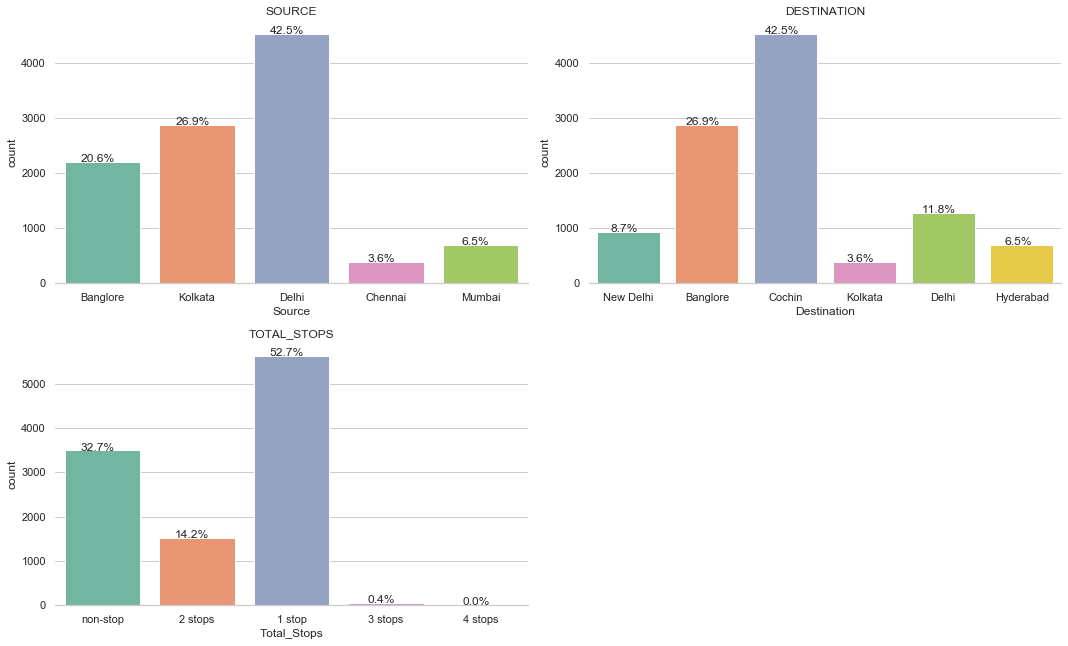

In [23]:
### Making a plot for the categorical datasets
def Countplot(list, data):
    
    plt.figure(figsize=(15,40))

    sns.set_theme(style='whitegrid')

    for i, variable in enumerate(list):
        
                   plt.subplot(9,2,i+1)
                   ## to set the palette
                   sns.set_palette('Set2')
                   ax =sns.countplot(x=data[variable], data=data)
                   sns.despine(top=True, right=True, left=True) # to remove side line from graph
                   for p in ax.patches:
                        
                       percentage= '{:.1f}%'.format(100*p.get_height()/len(data[variable]))
                       x= p.get_x() + p.get_width() / 2 -0.05
                       y= p.get_y() + p.get_height()
                       plt.annotate(percentage, (x,y), ha='center')
                       plt.tight_layout()
                       plt.title(list[i].upper())
                        
cols = [ 'Source', 'Destination', 'Total_Stops'] 

Countplot(cols, train)

In [24]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Multivariate analysis

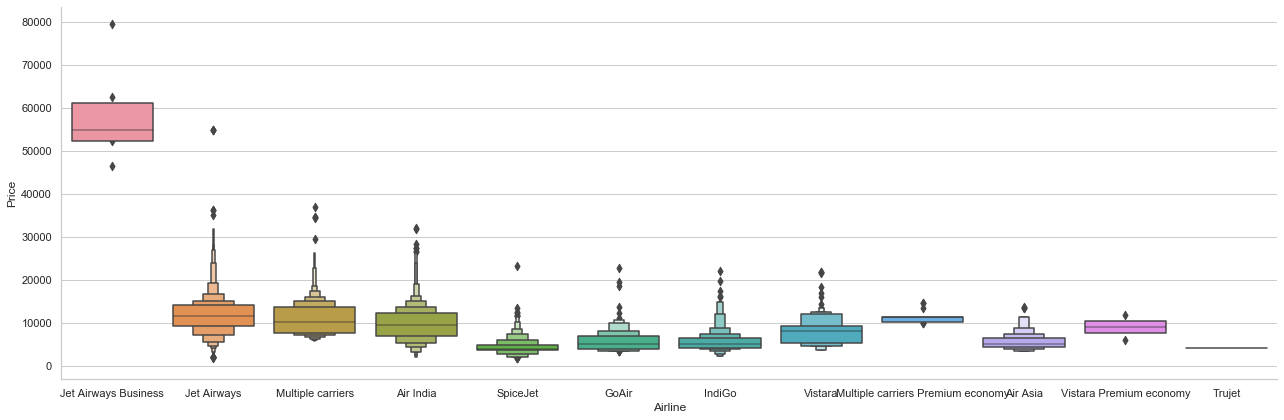

In [25]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

### Airline vs Price
sns.catplot(y='Price', x='Airline', data=train.sort_values('Price', ascending= False), kind='boxen', height= 6, aspect=3)
plt.show()

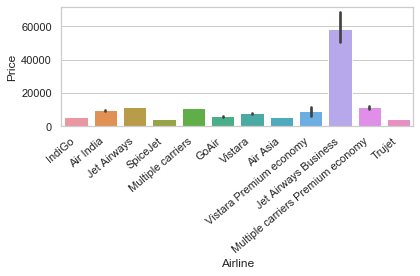

In [26]:
ax= sns.barplot(y='Price', x='Airline', data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()


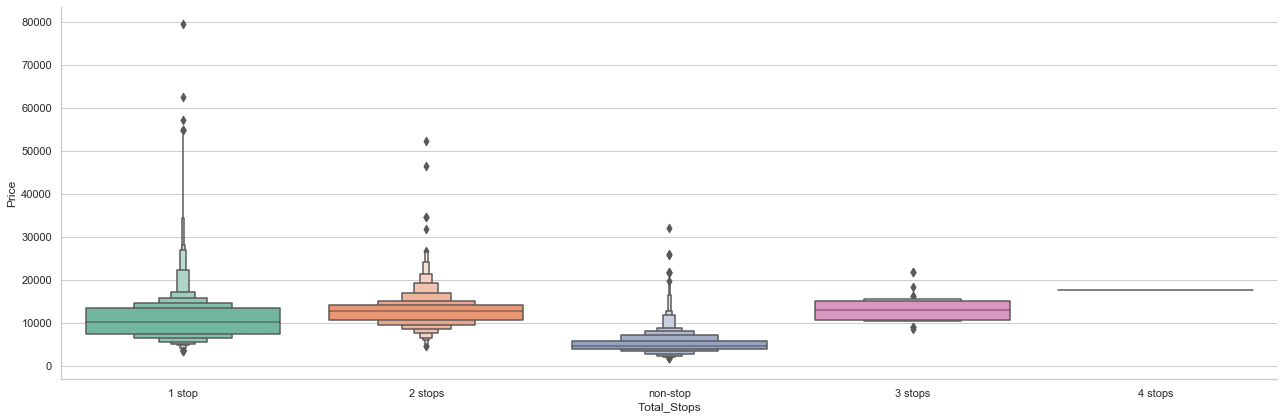

In [27]:

### Airline vs Price
sns.catplot(y='Price', x='Total_Stops', data=train.sort_values('Price', ascending= False), kind='boxen', height= 6, aspect=3)
plt.show()

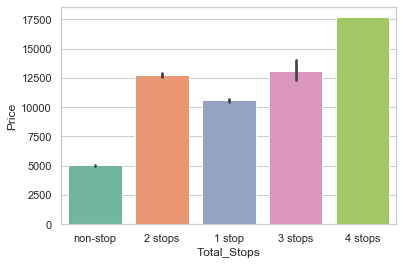

In [28]:
sns.barplot(y='Price', x='Total_Stops', data=train)


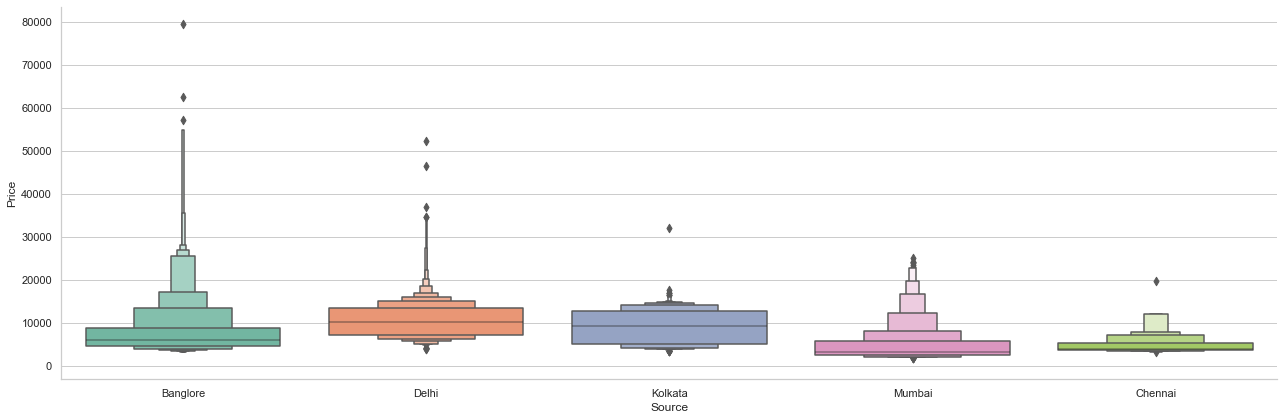

In [29]:

### Airline vs Price
sns.catplot(y='Price', x='Source', data=train.sort_values('Price', ascending= False), kind='boxen', height= 6, aspect=3)
plt.show()

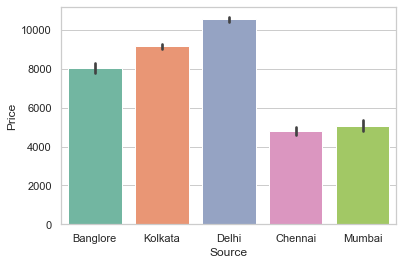

In [30]:
sns.barplot(y='Price', x='Source', data=train)


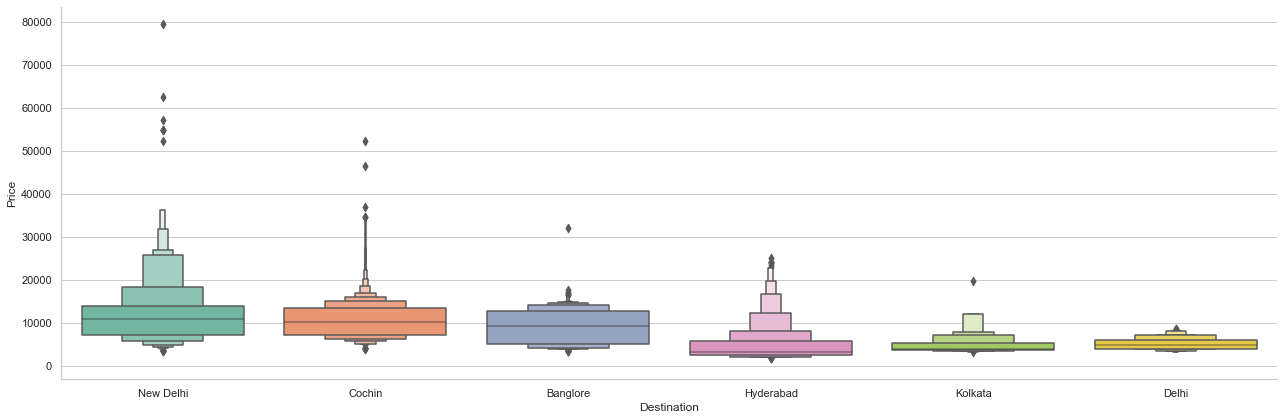

In [31]:

### Airline vs Price
sns.catplot(y='Price', x='Destination', data=train.sort_values('Price', ascending= False), kind='boxen', height= 6, aspect=3)
plt.show()

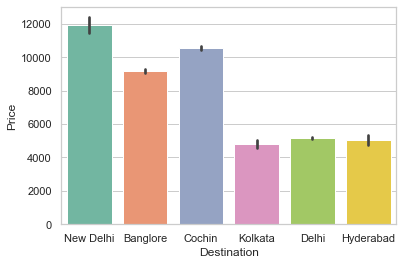

In [32]:
sns.barplot(y='Price', x='Destination', data=train)


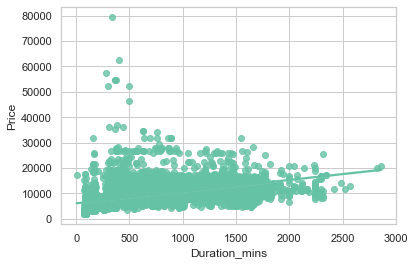

In [33]:
### Price vs Duration_mins
sns.regplot(y='Price', x='Duration_mins', data= train.sort_values('Price', ascending=False), order=1)

In [34]:
### since Airline is a Nominal Categorical data we would perform OneHotEncoding

Airline= train['Airline']
Airline= pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [35]:
train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

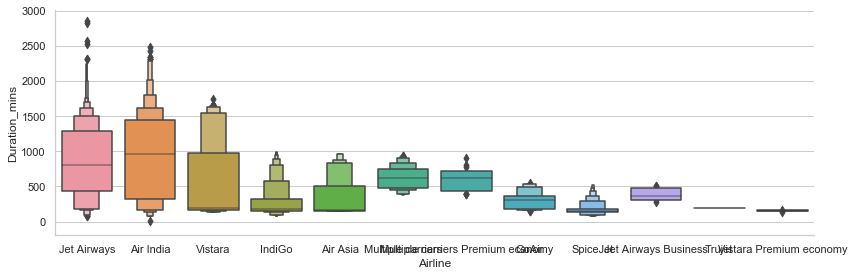

In [101]:


ax=sns.catplot(y = "Duration_mins", x = "Airline", data = train.sort_values("Duration_mins", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


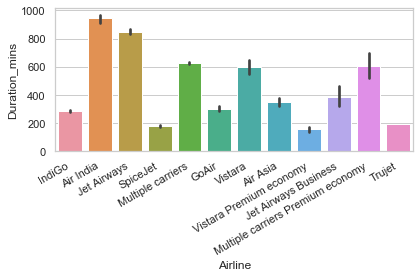

In [104]:
ax= sns.barplot(y='Duration_mins', x='Airline', data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()


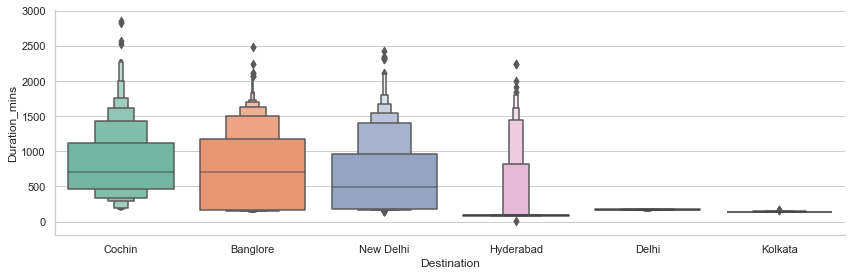

In [105]:


ax=sns.catplot(y = "Duration_mins", x = "Destination", data = train.sort_values("Duration_mins", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


##### Insights based on EDA
###### Jet Airways buisness and Jet Airways are the most expensive airline, while spicejet and indigo are the cheapest airline
###### As the number of stops increases the prices also increases
###### Delhi, kolkata and banglore are the most expensive airport to take off from
###### spicejet and vistara premium economy airways takes lesser time to get to their destination compared to other airways
###### it takes more time for airlines to get to banglore compared to other airways, it might be as a result of traffic or distance
###### time spent do not really have an effect on price changes

In [37]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train["Source"]

Source = pd.get_dummies(Source)

Source.head()


,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [38]:
Destination= train['Destination']
Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [39]:
Destination = pd.get_dummies(Destination)
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [40]:
train['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → IXB → DEL → BLR       1
CCU → VTZ → BLR             1
BOM → DED → DEL → HYD       1
BOM → JAI → DEL → HYD       1
BOM → JLR → HYD             1
Name: Route, Length: 128, dtype: int64

In [41]:
train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [42]:
## we can now see that Additional_Info contains almost 80%  No_Info which render this column almost useless

round(train['Additional_Info'].value_counts()/train.Additional_Info.value_counts().sum() *100,3)

No info                         78.113
In-flight meal not included     18.555
No check-in baggage included     2.996
1 Long layover                   0.178
Change airports                  0.066
Business class                   0.037
No Info                          0.028
2 Long layover                   0.009
Red-eye flight                   0.009
1 Short layover                  0.009
Name: Additional_Info, dtype: float64

In [43]:

## Route and Total_Stops are related to each other
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [44]:
##  we can drop both Route and Additional_Info
train.drop(['Additional_Info', 'Route'], axis=1, inplace=True)

In [45]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,21,35,16,50,285


In [46]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [47]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,285


In [48]:
### Concantenate dataframe ---> train , Airline, Source, Destination
new_train= pd.concat([train, Airline, Source, Destination], axis=1)

new_train

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,22,25,19,55,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,23,20,20,45,155,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,11,20,8,20,180,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,14,10,11,30,160,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [49]:
new_train.drop(['Airline', 'Source', 'Destination'], axis=1 , inplace=True)

new_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,1,10,22,20,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [50]:
new_train.drop(['Trujet'], axis=1, inplace=True)

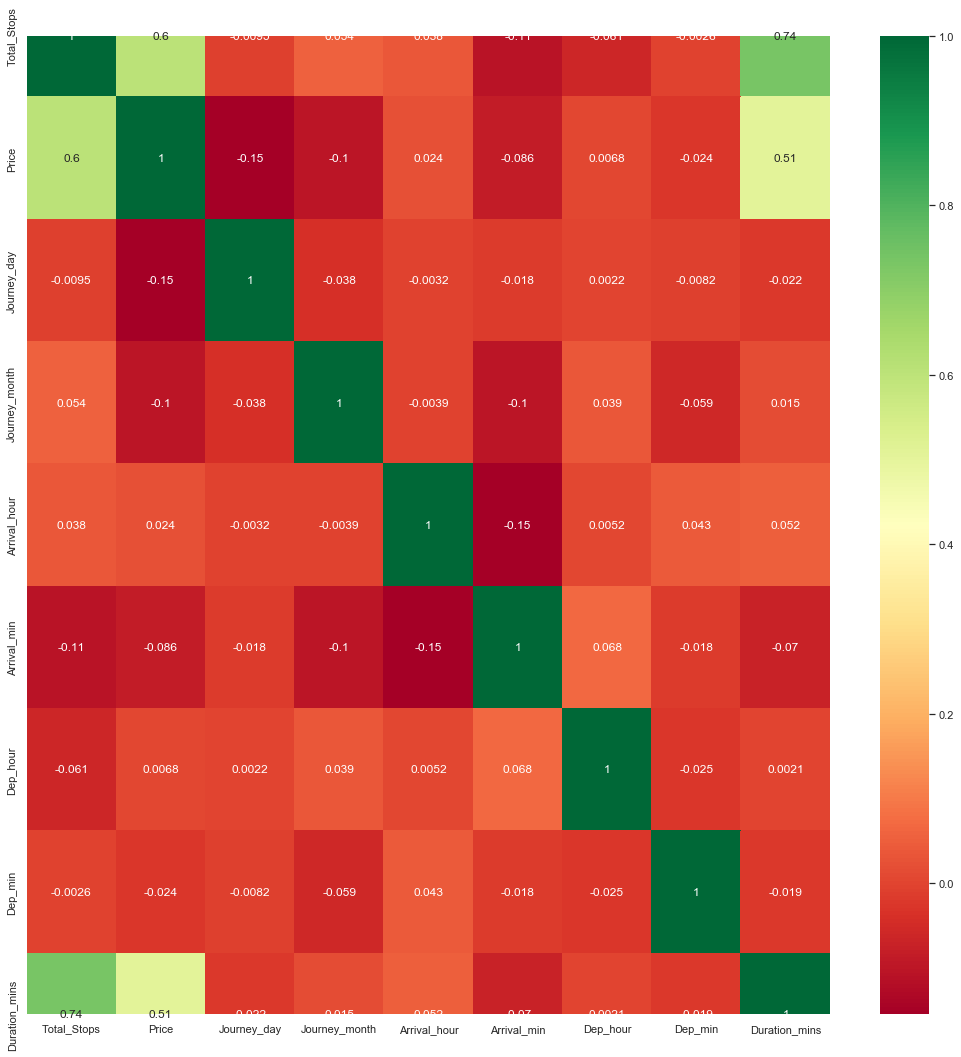

In [51]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()


### Test data

In [52]:
data = get_data('C:\\Users\\MAINGATE\\Desktop\\Flight_prediction\\Test_set.xlsx')
test= data.is_file()
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [53]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [54]:
report= Data_Report(test)
report.Report(test)

There are 2671 rows and 10 columns in the dataset

Features :

 ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']

Missing values :

 Additional_Info    0
Total_Stops        0
Duration           0
Arrival_Time       0
Dep_Time           0
Route              0
Destination        0
Source             0
Date_of_Journey    0
Airline            0
dtype: int64

Percentage of Missing Values :

 Additional_Info    0.0
Total_Stops        0.0
Duration           0.0
Arrival_Time       0.0
Dep_Time           0.0
Route              0.0
Destination        0.0
Source             0.0
Date_of_Journey    0.0
Airline            0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-nu

,count,unique,top,freq
Airline,2671,11,Jet Airways,897
Date_of_Journey,2671,44,9/05/2019,144
Source,2671,5,Delhi,1145
Destination,2671,6,Cochin,1145
Route,2671,100,DEL → BOM → COK,624
Dep_Time,2671,199,10:00,62
Arrival_Time,2671,704,19:00,113
Duration,2671,320,2h 50m,122
Total_Stops,2671,5,1 stop,1431
Additional_Info,2671,6,No info,2148


In [55]:
# EDA

# Date_of_Journey
test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_mins = []
for i in range(len(duration)):
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])  + int(duration[i].split(sep = "h")[0])*60)   # transform hours to minutes and add it to minutes from duration

# Adding Duration column to test set
test["Duration_mins"] = duration_mins
test.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*60)
print(test["Airline"].value_counts())
Airline = pd.get_dummies(test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test["Source"].value_counts())
Source = pd.get_dummies(test["Source"])

print()

print("Destination")
print("-"*60)
print(test["Destination"].value_counts())
Destination = pd.get_dummies(test["Destination"])

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
new_test = pd.concat([test, Airline, Source, Destination], axis = 1)

new_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", new_test.shape)


Airline
------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Shape of test data :  (2671, 29)


In [56]:
new_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,655,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,240,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,1425,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,780,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,170,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [57]:
new_test.shape

(2671, 29)

In [58]:
new_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_mins', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [59]:
y= new_train['Price']

new_train= new_train.drop(['Price'], axis=1)



In [60]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [61]:
X= new_train
X.shape

(10682, 29)

In [62]:
X.shape

(10682, 29)

### Model Building

In [63]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)


ExtraTreesRegressor()

In [64]:
print(selection.feature_importances_)

[2.30897502e-01 1.43028813e-01 5.46363186e-02 2.99429432e-02
 2.25955770e-02 2.61536003e-02 2.55783622e-02 1.29750763e-01
 1.00026982e-02 2.10502067e-03 1.79450962e-02 1.33652857e-01
 6.73565229e-02 1.85613342e-02 9.10934544e-04 3.11779690e-03
 5.20991856e-03 6.96773484e-05 9.17764580e-03 4.18951741e-04
 4.48324804e-03 1.77977708e-03 8.05862240e-03 1.95820180e-03
 1.42166012e-02 1.49311595e-02 6.74311909e-03 3.92887685e-04
 1.63240499e-02]


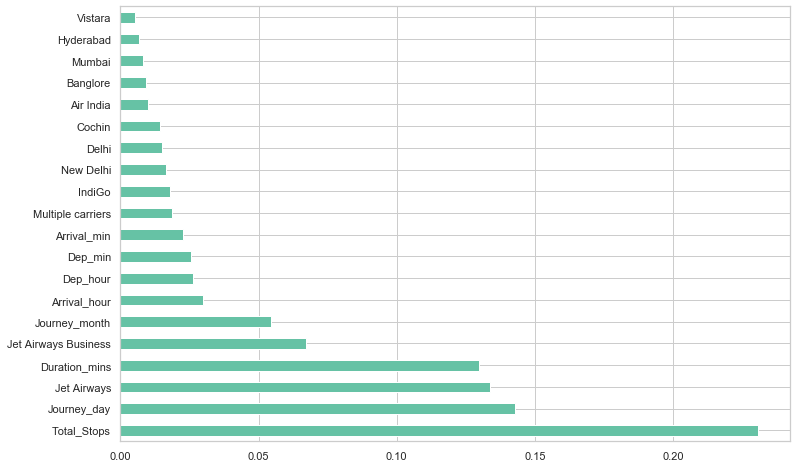

In [65]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


### Fitting model using Random Forest, linear Regression, Ridge Regression, Lasso Regression¶
#####  1. Split dataset into train and test set in order to prediction w.r.t X_test
#####  2. If needed do scaling of data
#####  3. Scaling is not  in Random forest but in all algorithm listed  above
#####  4.Import model
#####  5. Fit the data
#####  6. Predict w.r.t X_test
#####  7. In regression check RSME Score,mean of mse
#####  8. Plot graph


In [66]:

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [68]:
def get_metrics_score(model, X_Train, X_Test,  y_Train, y_Test, metrics, flag=True ):
    '''
    Function to get different metrics scores of the model like (Accuracy, Recall, Precision and F1 score)
    model: A classifier to predict the values of y_pred from an array of  input X(features)
    X_Train, X_Test: Independent Features
    y_Train, y_Test: Dependent Variable
    thershold: the threshold for classifiying observations as 1
    flag : if the flag is set to True then only the print statement will be displayed
    '''
    #### defining an empty sets were train and test score will be stored
    score_list =[]
    
   ## pred_train= model.fit(X_Train, y_Train)
    y_pred=model.predict(X_Test)
    train_acc= model.score(X_Train, y_Train)
    ##test_acc= model.score(X_Test, y_Test)
    r2_score= metrics.r2_score(y_Test, y_pred)
    MSE= metrics.mean_squared_error(y_Test, y_pred)
    
    
    score_list.extend((train_acc,  r2_score, MSE))
    if flag==True:
        Metric_Names= ['Train_Acuuracy', 'r2_Score',  'Mean_Squared_Error']
        cols= ['Metric', 'Score']
        records= [(name, score) for name, score in zip(Metric_Names, score_list)]
        display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
        
    
        
    return score_list ### returns the scores for train and test data

In [69]:
### define an empty list to add train and test results 
acc_train = []
r2_score = []
mse=[]
def add_score_model(score):
     '''add score of model to list'''
     acc_train.append(score[0])
     r2_score.append(score[1])
     mse.append(score[2])

In [70]:
lr= LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [71]:
lr_score= get_metrics_score(lr, X_train, X_test, y_train, y_test, metrics)
add_score_model(lr_score)

Metric,Train_Acuuracy,r2_Score,Mean_Squared_Error
Score,0.621567,0.626597,7.617776e+06


In [72]:
scaler= MinMaxScaler()
pipe=Pipeline([('scaler', MinMaxScaler()), ('lr', LinearRegression())])
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LinearRegression())])

In [73]:
lr_scaled=get_metrics_score(pipe, X_train, X_test, y_train, y_test, metrics)
add_score_model(lr_score)

Metric,Train_Acuuracy,r2_Score,Mean_Squared_Error
Score,0.621471,0.626673,7.616217e+06


In [74]:
ridge =Ridge()
parameters= {'alpha': [1e-15, 1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.44528e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.41516e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.32622e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.22058e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 100]},
             scoring='neg_mean_squared_error')

In [75]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-10}
-8279060.29930993


In [76]:
Ridge_Regressor= Ridge(alpha=1e-10)
Ridge_Regressor.fit(X_train,y_train)

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.39241e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=1e-10)

In [77]:
Rr_score= get_metrics_score(Ridge_Regressor, X_train, X_test, y_train, y_test, metrics)
add_score_model(Rr_score)

Metric,Train_Acuuracy,r2_Score,Mean_Squared_Error
Score,0.621567,0.626597,7.617776e+06


In [78]:

ridge_scaled=Pipeline([('scaler', MinMaxScaler()), ('Rr', Ridge(alpha=0.01))])
ridge_scaled.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler()), ('Rr', Ridge(alpha=0.01))])

In [79]:
ridge_Scaled_score= get_metrics_score(ridge_scaled, X_train, X_test, y_train, y_test, metrics)
add_score_model(ridge_Scaled_score)

Metric,Train_Acuuracy,r2_Score,Mean_Squared_Error
Score,0.621567,0.626604,7.617633e+06


#### Hyperparameter Tuning¶
##### 1.Choose following method for hyperparameter tuning
##### 2.RandomizedSearchCV --> Fast
##### 3.GridSearchCV
##### 4.Assign hyperparameters in form of dictionery
##### 5.Fit the model
##### 6.Check best paramters and best score


In [80]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [81]:
rf_score= get_metrics_score(reg_rf, X_train, X_test, y_train, y_test, metrics)
add_score_model(rf_score)

Metric,Train_Acuuracy,r2_Score,Mean_Squared_Error
Score,0.955252,0.822732,3.616441e+06


In [82]:
from sklearn.model_selection import RandomizedSearchCV


In [83]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [84]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [85]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [86]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  20.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [87]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [88]:
rf_tuned=RandomForestRegressor(n_estimators= 700,
 min_samples_split= 15,
                               
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 20
)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [89]:
prediction = rf_tuned.predict(X_test)


C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: 

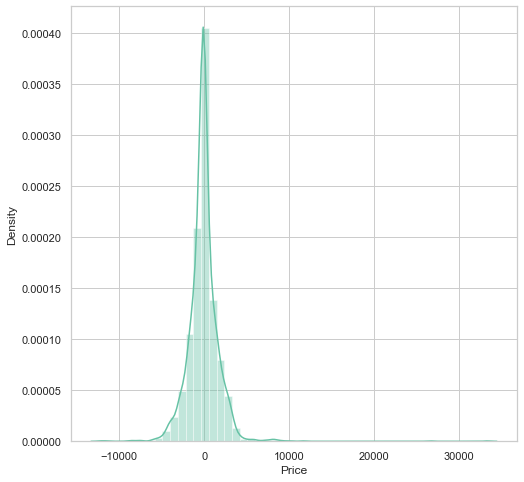

In [90]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()


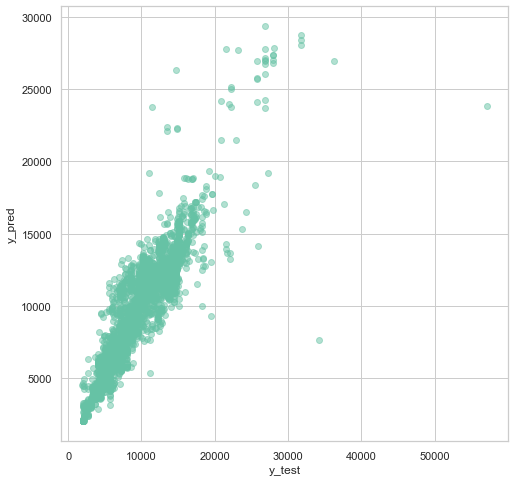

In [91]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [92]:
rf_tuned=RandomForestRegressor(n_estimators= 700,
 min_samples_split= 15,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 20
)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [93]:
pred= rf_tuned.predict(new_test)

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [94]:
rf_tuned_score= get_metrics_score(rf_tuned, X_train, X_test, y_train, y_test, metrics)
add_score_model(rf_tuned_score)

Metric,Train_Acuuracy,r2_Score,Mean_Squared_Error
Score,0.893846,0.834422,3.377952e+06


In [ ]:
import pickle
##open a file, where you ant to store the data
file = open('flight_rf2.pkl', 'wb')

##dump information to that file
pickle.dump(rf_tuned, file)


In [109]:

model = open('flight_rf2.pkl','rb')
forest = pickle.load(model)


In [110]:
y_prediction = forest.predict(X_test)


In [111]:
metrics.r2_score(y_test, y_prediction)


0.8350524927941271